# MICRO 2024 FuseMax Artifact Evaluation Figures 6-12

This notebook performs the modeling and generates the figures used in the paper, "FuseMax: Leveraging Extended Einsums to Optimize Attention Accelerator Design", which appeared in MICRO 2024.

**Warning: Running a cell more than once will overwrite the previous output for the selected experiment. Please back up all results as soon as they are produced in case you accidentally rerun the cell.** All results are stored in `workspace/outputs/generated/<experiment name>`. 

In [1]:
%matplotlib inline

import os
import sys
sys.path.insert(0, "..")

import src.scripts.experiments as experiments
import src.scripts.check as check
import src.scripts.run as run
import src.utils.graph as graph

Select an existing experiment or create a new one

In [2]:
exp = experiments.Experiments()

Dropdown(description='Select experiment:', options=('pregenerated', '2025-04-25_12-23-40', '2025-04-27_14-36-2…

Button(description='New Experiment', style=ButtonStyle())

Button(button_style='danger', description='Delete Experiment', style=ButtonStyle())

Output()

## Collect Data

Run the Timeloop/Accelergy models of the baselines and various configurations of FuseMax. These cells can be skipped by instead using the `pregenerated` results.

Expected Run Time: 9 hours

**Warning: Running a cell more than once will overwrite the previous output for the selected experiment. Please back up all results as soon as they are produced in case you accidentally rerun the cell.** All results are stored in `workspace/outputs/generated/<experiment name>`. 

### Model Attention

The following cells model the five configurations of attention: two baselines—the unfused baseline and [FLAT](https://dl.acm.org/doi/10.1145/3575693.3575747)—and three configurations of FuseMax—adding the cascade, architecture, and binding. These cells are required to generate Figures 6-11.

#### Model the Unfused Baseline

In [4]:
run.attn("unfused", experiment_dir=exp.get_output_dir())

Evaluating models:   0%|          | 0/2 [00:00<?, ?combination/s]

Evaluating BERT on 1K tokens
Evaluating BERT on 4K tokens


Check that the outputs match the results generated by the authors:

In [5]:
check.outputs("attn-unfused", experiment_dir=exp.get_output_dir())

Does not match pregenerated outputs


#### Model FLAT

In [6]:
run.attn("flat", experiment_dir=exp.get_output_dir())

Evaluating models:   0%|          | 0/2 [00:00<?, ?combination/s]

Evaluating BERT on 1K tokens
Evaluating BERT on 4K tokens


Check that the outputs match the results generated by the authors:

In [ ]:
check.outputs("attn-flat", experiment_dir=exp.get_output_dir())

#### Model `+Cascade`

Model an attention accelerator that uses the FuseMax cascade on the FLAT architecture.

In [7]:
run.attn("cascade", experiment_dir=exp.get_output_dir())

Evaluating models:   0%|          | 0/2 [00:00<?, ?combination/s]

Evaluating BERT on 1K tokens
Evaluating BERT on 4K tokens


Check that the outputs match the results generated by the authors:

In [ ]:
check.outputs("attn-cascade", experiment_dir=exp.get_output_dir())

#### Model `+Architecture`

Model an attention accelerator that uses the FuseMax cascade and architecture, but evaluates one tile at a time (instead of FuseMax's interleaved binding).

In [8]:
run.attn("arch", experiment_dir=exp.get_output_dir())

Evaluating models:   0%|          | 0/2 [00:00<?, ?combination/s]

Evaluating BERT on 1K tokens
Evaluating BERT on 4K tokens


Check that the outputs match the results generated by the authors:

In [ ]:
check.outputs("attn-arch", experiment_dir=exp.get_output_dir())

#### Model `+Binding`

Model the full FuseMax attention accelerator

In [9]:
run.attn("binding", experiment_dir=exp.get_output_dir())

Evaluating models:   0%|          | 0/2 [00:00<?, ?combination/s]

Evaluating BERT on 1K tokens
Evaluating BERT on 4K tokens


Check that the outputs match the results generated by the authors:

In [ ]:
check.outputs("attn-binding", experiment_dir=exp.get_output_dir())

### Model End-to-End Transformer Inference

The following cells model the linear layers—Q, K, and V projection, deprojection, and the FFN layers—on both the [FLAT](https://dl.acm.org/doi/10.1145/3575693.3575747) and FuseMax architectures. These cells are required to generate Figures 10 and 11.

#### Model Linear Layers on FLAT Architecture

In [10]:
run.end2end("flat", experiment_dir=exp.get_output_dir())

Evaluating models:   0%|          | 0/24 [00:00<?, ?combination/s]

Evaluating BERT on 1K tokens
Evaluating BERT on 4K tokens
Evaluating BERT on 16K tokens
Evaluating BERT on 64K tokens
Evaluating BERT on 256K tokens
Evaluating BERT on 1M tokens
Evaluating TrXL on 1K tokens
Evaluating TrXL on 4K tokens
Evaluating TrXL on 16K tokens
Evaluating TrXL on 64K tokens
Evaluating TrXL on 256K tokens
Evaluating TrXL on 1M tokens
Evaluating T5 on 1K tokens
Evaluating T5 on 4K tokens
Evaluating T5 on 16K tokens
Evaluating T5 on 64K tokens
Evaluating T5 on 256K tokens
Evaluating T5 on 1M tokens
Evaluating XLM on 1K tokens
Evaluating XLM on 4K tokens
Evaluating XLM on 16K tokens
Evaluating XLM on 64K tokens
Evaluating XLM on 256K tokens
Evaluating XLM on 1M tokens


Check that the outputs match the results generated by the authors:

In [ ]:
check.outputs("end2end-flat", experiment_dir=exp.get_output_dir())

#### Model Linear Layers on FuseMax Architecture

In [11]:
run.end2end("proposal", experiment_dir=exp.get_output_dir())

Evaluating models:   0%|          | 0/24 [00:00<?, ?combination/s]

Evaluating BERT on 1K tokens
Evaluating BERT on 4K tokens
Evaluating BERT on 16K tokens
Evaluating BERT on 64K tokens
Evaluating BERT on 256K tokens
Evaluating BERT on 1M tokens
Evaluating TrXL on 1K tokens
Evaluating TrXL on 4K tokens
Evaluating TrXL on 16K tokens
Evaluating TrXL on 64K tokens
Evaluating TrXL on 256K tokens
Evaluating TrXL on 1M tokens
Evaluating T5 on 1K tokens
Evaluating T5 on 4K tokens
Evaluating T5 on 16K tokens
Evaluating T5 on 64K tokens
Evaluating T5 on 256K tokens
Evaluating T5 on 1M tokens
Evaluating XLM on 1K tokens
Evaluating XLM on 4K tokens
Evaluating XLM on 16K tokens
Evaluating XLM on 64K tokens
Evaluating XLM on 256K tokens
Evaluating XLM on 1M tokens


Check that the outputs match the results generated by the authors:

In [ ]:
check.outputs("end2end-proposal", experiment_dir=exp.get_output_dir())

### Sweep Architecture Area

The following cell sweeps various accelerator architectures design points for attention to build a pareto-optimal curve of design points.

In [ ]:
run.pareto(experiment_dir=exp.get_output_dir())

Check that the outputs match the results generated by the authors:

In [ ]:
check.outputs("pareto", experiment_dir=exp.get_output_dir())

## Draw Figures

Note: All figures are also saved to `workspace/outputs/generated/<experiment name>/figs` and can be compared with `workspace/outputs/pregenerated/figs`.

### Figure 6a

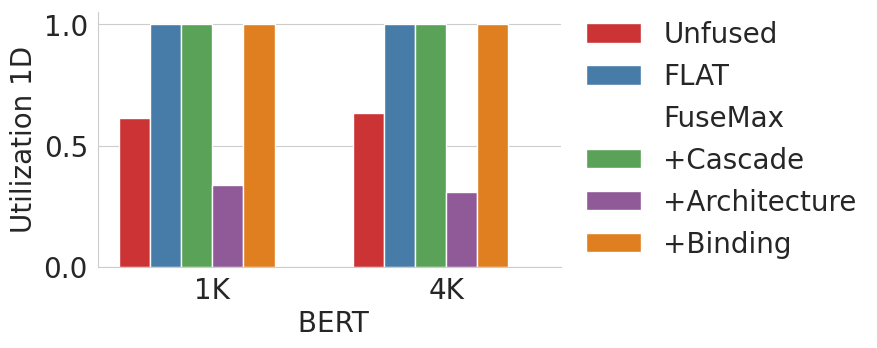

In [12]:
experiment_dir = exp.get_output_dir()
data = graph.load_data("util_1d", experiment_dir=experiment_dir)
graph.draw_bar_graph(data, "Utilization 1D", "fig6a", experiment_dir=experiment_dir)

### Figure 6b

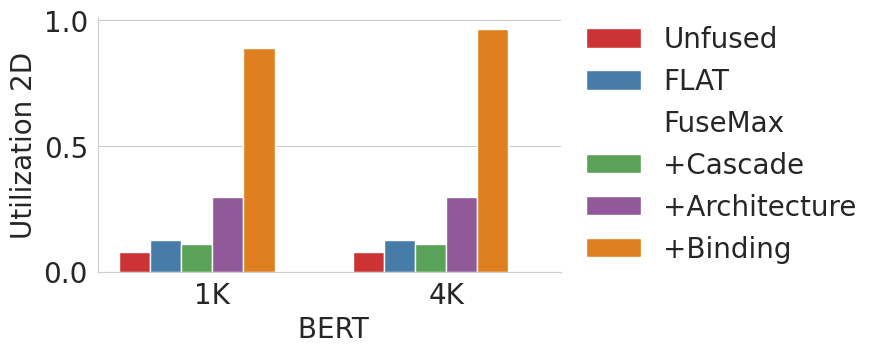

In [13]:
experiment_dir = exp.get_output_dir()
data = graph.load_data("util_2d", experiment_dir=experiment_dir)
graph.draw_bar_graph(data, "Utilization 2D", "fig6b", experiment_dir=experiment_dir)

### Figure 7

AttributeError: 'NoneType' object has no attribute 'remove'

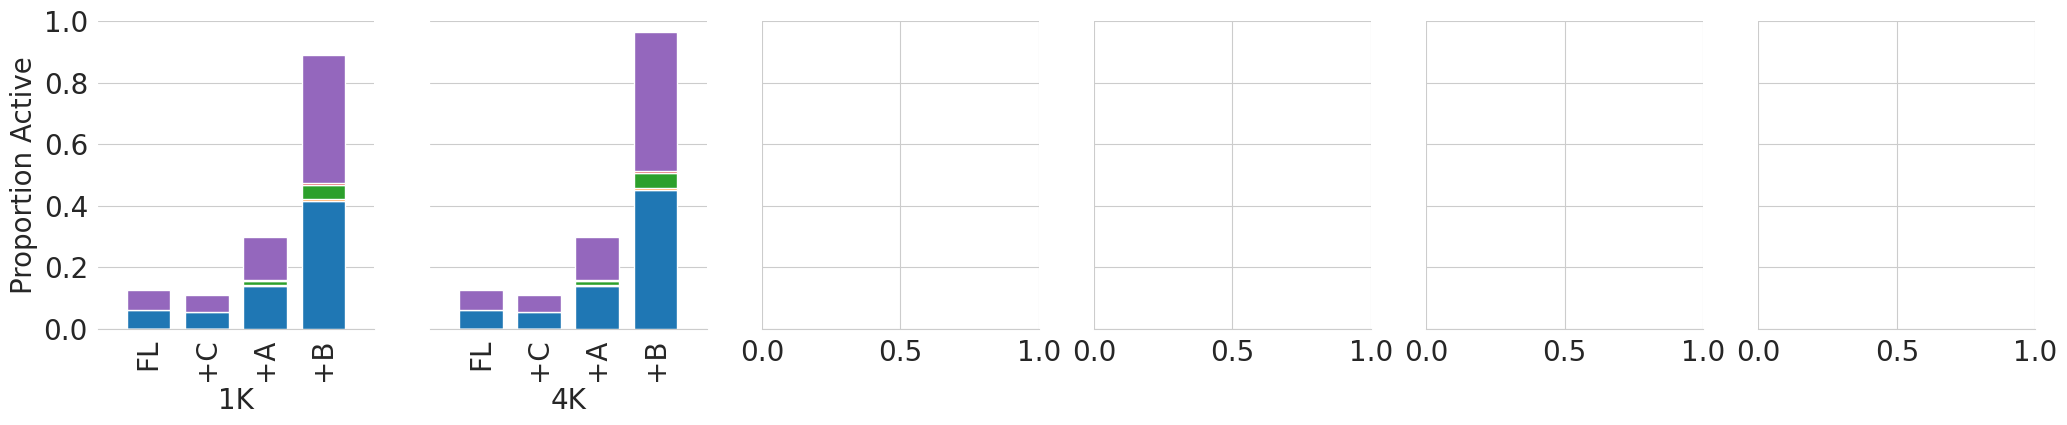

In [14]:
experiment_dir = exp.get_output_dir()
graph.draw_breakdown(experiment_dir=experiment_dir)

### Figure 8

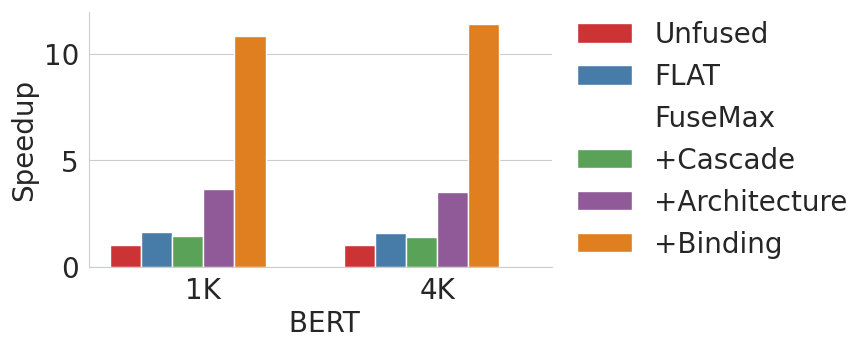

In [15]:
experiment_dir = exp.get_output_dir()
data = graph.load_data("latency", data_cb=lambda a, u: u / a, experiment_dir=experiment_dir)
graph.draw_bar_graph(data, "Speedup", "fig8", experiment_dir=experiment_dir)

### Figure 9

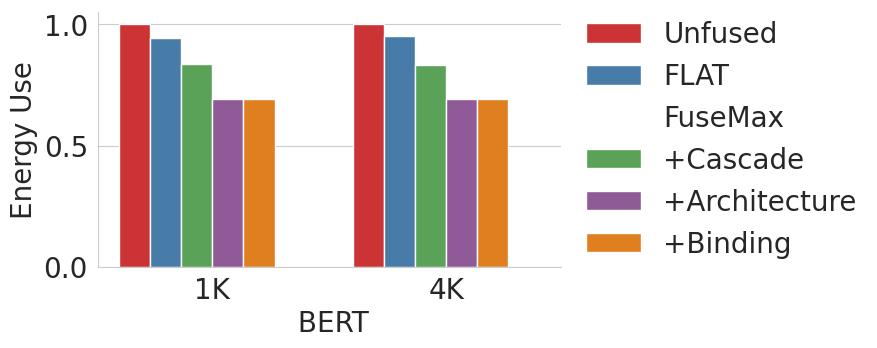

In [16]:
experiment_dir = exp.get_output_dir()
data = graph.load_data("energy", data_cb=lambda a, u: a / u, experiment_dir=experiment_dir)
graph.draw_bar_graph(data, "Energy Use", "fig9", experiment_dir=experiment_dir)

### Figure 10

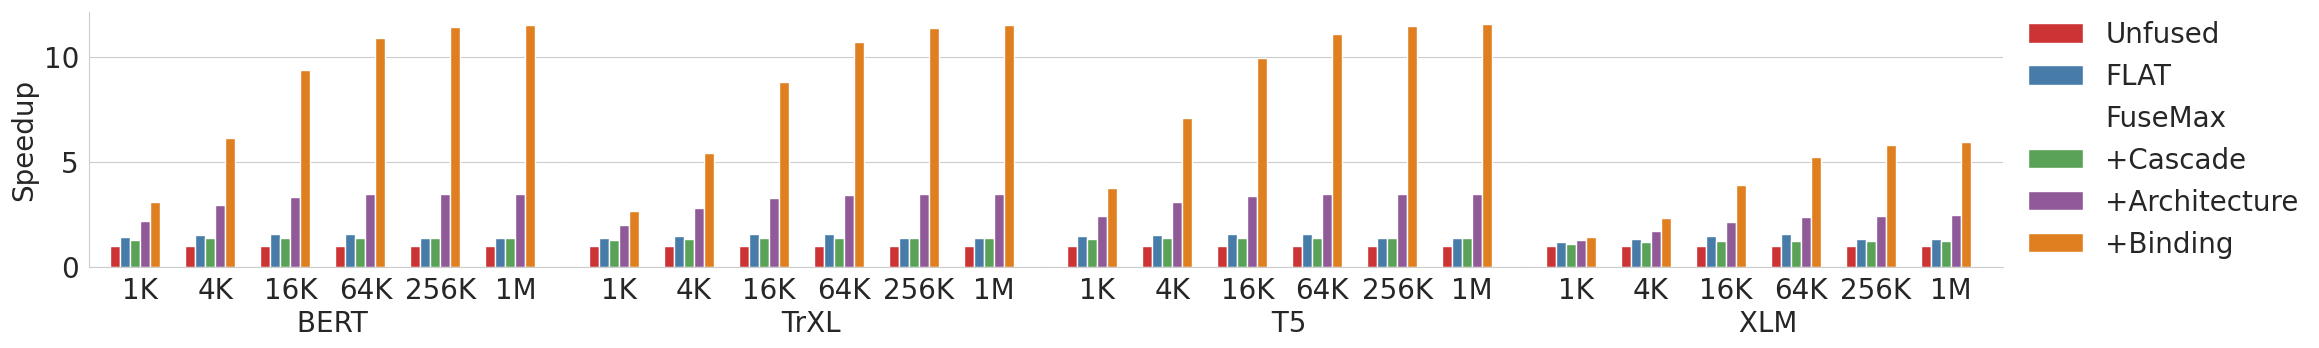

In [9]:
experiment_dir = exp.get_output_dir()
data = graph.load_data("latency", kernel="end2end", data_cb=lambda a, u: u / a, experiment_dir=experiment_dir)
graph.draw_bar_graph(data, "Speedup", "fig10", experiment_dir=experiment_dir)

### Figure 11

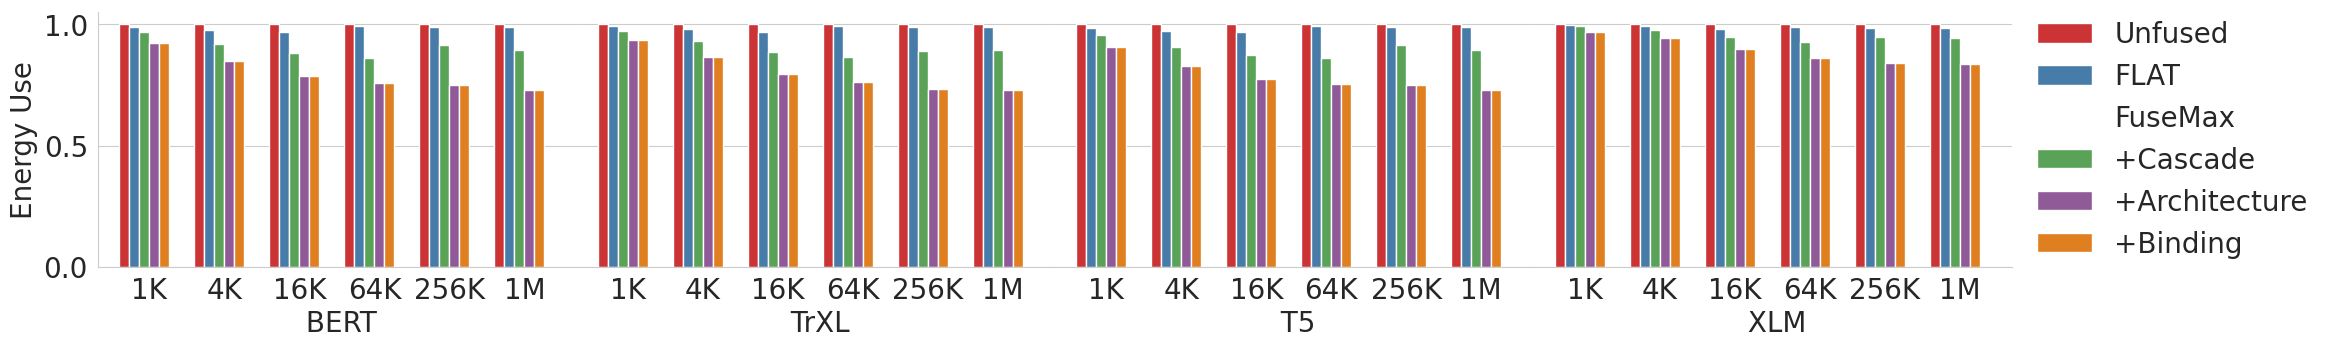

In [10]:
experiment_dir = exp.get_output_dir()
data = graph.load_data("energy", kernel="end2end", data_cb=lambda a, u: a / u, experiment_dir=experiment_dir)
graph.draw_bar_graph(data, "Energy Use", "fig11", experiment_dir=experiment_dir)

### Figure 12

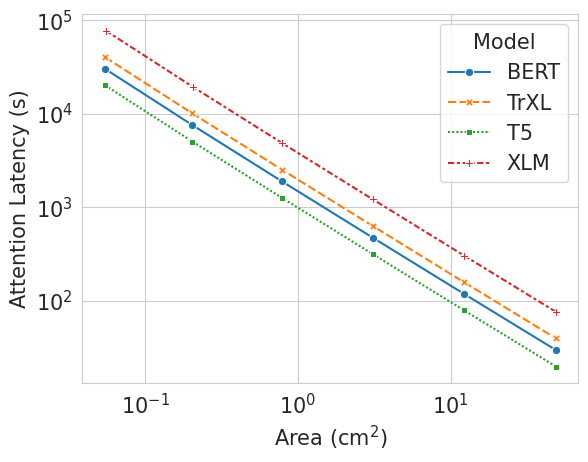

In [11]:
experiment_dir = exp.get_output_dir()
graph.draw_pareto(experiment_dir=experiment_dir)